#  Анализ данных компании 'Мегалайн'

**Цель исследования** —  сделать предварительный анализ тарифов на небольшой выборке клиентов:
1.  Проанализировать данные
- сколько минут разговоратребуется пользователям каждого тарифа в месяц?
- сколько сообщений требуется пользователям каждого тарифа в месяц?
-  какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
2. Проверить гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

Данные получены из нескольеих файлов:  `/datasets/calls.csv.`, `/datasets/internet.csv.` , `/datasets/messages.csv` , `/datasets/tariffs.csv.`, `/datasets/users.csv.`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Данные будут проверны  на ошибки и оценено их влияние на исследование. Затем, на этапе предобработки исправляются самые критичные ошибки данных.

На основе данных считаются и добавляются новые столбцы.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление новых столцов.
 4. Исследовательский анализ
 5. Проверка гипотез

## 1 Обзор данных

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from math import factorial

import math

from scipy import stats as st

In [2]:
# Код студента
try:
    data_calls = pd.read_csv('calls.csv.')
# Код ревьюера
except:
    data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head()
 # чтение файла с данными и сохранение в перемкнную

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице `calls` 4 столбца (информация о звонках). Тип данных в столбцах различается. Присутствует — `float64`(1), `int64`(1), `object`(2).

Согласно документации к данным:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок


В названиях колонок не выявлено нарушение стиля.

Количество значений в столбцах не различается. Значит, в данных нет пропущенных значений.

In [51]:
data_internet = pd.read_csv('internet.csv.')


In [52]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице `internet` 4 столбца  (информация об интернет-сессиях). Тип данных в столбцах различается. Присутствует — `float64`(1), `int64`(1), `object`(2).

Согласно документации к данным:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя


В названиях колонок не выявлено нарушение стиля.

Количество значений в столбцах не различается. Значит, в данных нет пропущенных значений.

In [54]:
data_messages = pd.read_csv('messages.csv.')
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице `messages` 3 столбца (информация о сообщениях). Тип данных в столбцах различается. Присутствует —  `int64`(1), `object`(2).

Согласно документации к данным:
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

В названиях колонок не выявлено нарушение стиля.

Количество значений в столбцах не различается. Значит, в данных нет пропущенных значений.

In [56]:
data_tariffs = pd.read_csv('tariffs.csv.')
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице `tariffs` 8 столбцов (информация о тарифах). Тип данных в столбцах различается. Присутствует — `int64`(7), `object`(1).
​
Согласно документации к данным:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета 
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета
​
В названиях колонок не выявлено нарушение стиля.
​
Количество значений в столбцах не различается. Значит, в данных нет пропущенных значений.

In [57]:
data_users = pd.read_csv('users.csv.')

data_users.head()
 # чтение файла с данными и сохранение в перемкнную

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице `users` 8 столбцов (информация о тарифах). Тип данных в столбцах различается. Присутствует — `int64`(2), `object`(6).

Согласно документации к данным:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

В названиях колонок не выявлено нарушение стиля.

## 2 Предобработка данных

### Перевод данных

In [12]:
sl = {'call_date': data_calls, 'message_date': data_messages, 'session_date': data_internet}

In [13]:
for key, value in sl.items():
    value[key] = pd.to_datetime( value[key], format='%Y.%m.%d') 
    value['month'] =pd.DatetimeIndex(value[key]).month
# первод времени в формат, подходящий для работы с датами
#добавление столбцов с месяцами 

In [14]:
data_calls['duration'] = round(data_calls['duration'] +.5)

data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [15]:
data_calls_group = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum'])
data_calls_group.columns = [ 'duration_count_month','duration_sum_month' ]
data_calls_group = data_calls_group.reset_index()
data_calls_group
#количество сделанных звонков и израсходованных минут разговора по месяцам;

,user_id,month,duration_count_month,duration_sum_month
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,409.0
4,1000,9,58,467.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


### Создание сводных таблиц 

In [16]:
data_messages_group = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count'])
data_messages_group.columns = [ 'sms_count_month' ]
data_messages_group = data_messages_group.reset_index()
data_messages_group
# подсчет количества отправленных сообщений по месяцам;


,user_id,month,sms_count_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [17]:
data_internet_group = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum'])
data_internet_group.columns = [ 'mb_month' ]
data_internet_group['gb_month'] = data_internet_group['mb_month'] / 1024
data_internet_group = data_internet_group.reset_index()
data_internet_group
# подсчет объема израсходованного интернет-трафика по месяцам;


,user_id,month,mb_month,gb_month
0,1000,5,2253.49,2.200674
1,1000,6,23233.77,22.689229
2,1000,7,14003.64,13.675430
3,1000,8,14055.93,13.726494
4,1000,9,14568.91,14.227451
...,...,...,...,...
3198,1498,10,20579.36,20.097031
3199,1499,9,1845.75,1.802490
3200,1499,10,17788.51,17.371592
3201,1499,11,17963.31,17.542295


In [18]:
data_calls_user = data_calls_group.merge(data_users, on='user_id')
data_calls_user.head()
# соединение сводной таблицы с информацией о пользователе

,user_id,month,duration_count_month,duration_sum_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,159.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,409.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,467.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [19]:
data_messages_user = data_messages_group.merge(data_users, on='user_id')
data_messages_user.head()
# соединение сводной таблицы с информацией о пользователе

,user_id,month,sms_count_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [20]:
data_internet_user = data_internet_group.merge(data_users, on='user_id')
# соединение сводной таблицы с информацией о пользователе

In [21]:
data_internet_user.head()

,user_id,month,mb_month,gb_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,2253.49,2.200674,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,23233.77,22.689229,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,14003.64,13.675430,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,14055.93,13.726494,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,14568.91,14.227451,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [22]:
data_tariffs 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Подсчет затрат пользователя на доп звонки, смс и интернет

In [23]:
columns_calls = []
for a in range(len(data_calls_user['user_id'])):
    if data_calls_user['tariff'][a] == 'smart' and data_calls_user['duration_sum_month'][a]- 500 > 0 :
        columns_calls.append(round(data_calls_user['duration_sum_month'][a]- 500) * 3)
    elif data_calls_user['tariff'][a] == 'smart' and data_calls_user['duration_sum_month'][a]- 500 <= 0 :
           columns_calls.append(0)
    elif data_calls_user['tariff'][a] == 'ultra' and data_calls_user['duration_sum_month'][a]- 3000 > 0 :
        columns_calls.append(round(data_calls_user['duration_sum_month'][a]- 3000) * 1)
    elif data_calls_user['tariff'][a] == 'ultra' and data_calls_user['duration_sum_month'][a]- 3000 <= 0 :
           columns_calls.append(0)
# подсчет затрат пользователя на доп звонки

In [24]:
data_calls_user['calls_money'] = columns_calls
#добавление столбца с затратами на доп звонки

In [25]:
data_calls_user.head(10)

,user_id,month,duration_count_month,duration_sum_month,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_money
0,1000,5,22,159.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6,43,172.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7,47,340.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8,52,409.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9,58,467.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000,10,57,350.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000,11,43,338.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000,12,46,333.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1001,11,59,430.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0
9,1001,12,63,414.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0


In [26]:
columns_messages = []
for a in range(len(data_messages_user['user_id'])):
    if data_messages_user['tariff'][a] == 'smart' and data_messages_user['sms_count_month'][a]- 50 > 0 :
        columns_messages.append(round(data_messages_user['sms_count_month'][a]- 50) * 3)
    elif data_messages_user['tariff'][a] == 'smart' and data_messages_user['sms_count_month'][a]- 50 <= 0 :
           columns_messages.append(0)
    elif data_messages_user['tariff'][a] == 'ultra' and data_messages_user['sms_count_month'][a]- 1000 > 0 :
        columns_messages.append(round(data_messages_user['sms_count_month'][a]- 1000) * 1)
    elif data_messages_user['tariff'][a] == 'ultra' and data_messages_user['sms_count_month'][a]- 1000 <= 0 :
           columns_messages.append(0)
# подсчет затрат пользователя на доп смс

In [27]:
data_messages_user['messages_money'] = columns_messages
#добавление столбца с затратами на доп смс

In [28]:
data_messages_user.head(10)

,user_id,month,sms_count_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_money
0,1000,5,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000,10,73,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000,11,58,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000,12,70,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1002,6,4,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
9,1002,7,11,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0


In [29]:
columns_internet = []
for a in range(len(data_internet_user['user_id'])):
    if data_internet_user['tariff'][a] == 'smart' and data_internet_user['gb_month'][a]- (15360/1024)> 0 :
        columns_internet.append(round(data_internet_user['gb_month'][a]- (15360/1024)) * 200)
    elif data_internet_user['tariff'][a] == 'smart' and data_internet_user['gb_month'][a]- (15360/1024) < 0 :
           columns_internet.append(0)
    elif data_internet_user['tariff'][a] == 'ultra' and data_internet_user['gb_month'][a]- (30720/1024)> 0 :
        columns_internet.append(round(data_internet_user['gb_month'][a]- (30720/1024)) * 200)
    elif data_internet_user['tariff'][a] == 'ultra' and data_internet_user['gb_month'][a]- (30720/1024) < 0 :
           columns_internet.append(0)
 #   # подсчет затрат пользователя на доп интернет 

In [30]:
data_internet_user['internet_money'] = columns_internet
#добавление столбца с затратами на доп интернет

In [31]:
data_internet_user.head(10)

,user_id,month,mb_month,gb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_money
0,1000,5,2253.49,2.200674,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6,23233.77,22.689229,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7,14003.64,13.675430,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8,14055.93,13.726494,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9,14568.91,14.227451,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000,10,14702.49,14.357900,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000,11,14756.47,14.410615,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000,12,9817.61,9.587510,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1001,11,18429.34,17.997402,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,600
9,1001,12,14036.66,13.707676,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0


### Объединение таблиц и удаление лишних столбцов

In [32]:
data_all = data_calls_user.merge(data_messages_user, on=['user_id','month'], how='outer')
data_all = data_all.merge(data_internet_user, on=['user_id','month'], how='outer')
# объединение таблиц

In [33]:
data_all

,user_id,month,duration_count_month,duration_sum_month,age_x,churn_date_x,city_x,first_name_x,last_name_x,reg_date_x,...,mb_month,gb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_money
0,1000,5,22.0,159.0,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,...,2253.49,2.200674,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
1,1000,6,43.0,172.0,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,...,23233.77,22.689229,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
2,1000,7,47.0,340.0,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,...,14003.64,13.675430,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
3,1000,8,52.0,409.0,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,...,14055.93,13.726494,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
4,1000,9,58.0,467.0,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,...,14568.91,14.227451,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17206.30,16.803027,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0
3210,1489,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19559.44,19.101016,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,800.0
3211,1489,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17491.56,17.081602,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0
3212,1489,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17322.51,16.916514,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0


In [34]:
data_all.columns

Index(['user_id', 'month', 'duration_count_month', 'duration_sum_month',
       'age_x', 'churn_date_x', 'city_x', 'first_name_x', 'last_name_x',
       'reg_date_x', 'tariff_x', 'calls_money', 'sms_count_month', 'age_y',
       'churn_date_y', 'city_y', 'first_name_y', 'last_name_y', 'reg_date_y',
       'tariff_y', 'messages_money', 'mb_month', 'gb_month', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'internet_money'],
      dtype='object')

In [35]:
data_all = data_all.drop(columns=['age_x', 'churn_date_x', 'city_x', 'first_name_x', 'last_name_x', 'reg_date_x', 'tariff_x','age_y','churn_date_y', 'city_y', 'first_name_y', 'last_name_y', 'reg_date_y', 'tariff_y'])
data_all
#удаление повторяющихся столбцов 

,user_id,month,duration_count_month,duration_sum_month,calls_money,sms_count_month,messages_money,mb_month,gb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_money
0,1000,5,22.0,159.0,0.0,22.0,0.0,2253.49,2.200674,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
1,1000,6,43.0,172.0,0.0,60.0,0.0,23233.77,22.689229,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
2,1000,7,47.0,340.0,0.0,75.0,0.0,14003.64,13.675430,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
3,1000,8,52.0,409.0,0.0,81.0,0.0,14055.93,13.726494,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
4,1000,9,58.0,467.0,0.0,57.0,0.0,14568.91,14.227451,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,NaN,32.0,0.0,17206.30,16.803027,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0
3210,1489,10,NaN,NaN,NaN,21.0,0.0,19559.44,19.101016,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,800.0
3211,1489,11,NaN,NaN,NaN,20.0,0.0,17491.56,17.081602,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0
3212,1489,12,NaN,NaN,NaN,35.0,0.0,17322.51,16.916514,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0


### Подсчет помесячной выручки

In [36]:
columns = ['calls_money', 'messages_money','internet_money']
for a in columns:
    data_all[a] = data_all[a].fillna(0)
# заполнение пропусков в  столбцах, необходимых для  подсчета помесячной выручки с каждого пользователя

In [37]:
money =[]

for a in range(len(data_all['user_id'])):
    if data_all['tariff'][a] == 'smart':
        money.append(data_all['calls_money'][a] + data_all['messages_money'][a] + data_all['internet_money'][a] + 550)
    else:
        money.append(data_all['calls_money'][a] + data_all['messages_money'][a] + data_all['internet_money'][a] + 1950) 

data_all['user_money'] = money

In [38]:
data_all

,user_id,month,duration_count_month,duration_sum_month,calls_money,sms_count_month,messages_money,mb_month,gb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_money,user_money
0,1000,5,22.0,159.0,0.0,22.0,0.0,2253.49,2.200674,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
1,1000,6,43.0,172.0,0.0,60.0,0.0,23233.77,22.689229,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
2,1000,7,47.0,340.0,0.0,75.0,0.0,14003.64,13.675430,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
3,1000,8,52.0,409.0,0.0,81.0,0.0,14055.93,13.726494,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
4,1000,9,58.0,467.0,0.0,57.0,0.0,14568.91,14.227451,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,0.0,32.0,0.0,17206.30,16.803027,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0,950.0
3210,1489,10,NaN,NaN,0.0,21.0,0.0,19559.44,19.101016,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,800.0,1350.0
3211,1489,11,NaN,NaN,0.0,20.0,0.0,17491.56,17.081602,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0,950.0
3212,1489,12,NaN,NaN,0.0,35.0,0.0,17322.51,16.916514,35.0,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,400.0,950.0


### Избавление от пропусков в столбцах необходимых для анализа

In [39]:
data_all.isna().sum()

user_id                    0
month                      0
duration_count_month      40
duration_sum_month        40
calls_money                0
sms_count_month          497
messages_money             0
mb_month                  11
gb_month                  11
age                       11
churn_date              3028
city                      11
first_name                11
last_name                 11
reg_date                  11
tariff                    11
internet_money             0
user_money                 0
dtype: int64

In [40]:
data_all_dropna = data_all.dropna(subset=['duration_sum_month', 'sms_count_month', 'gb_month'])
#  удаляем пропуски и сохраняем их в другой переменной чтобы не терять данные в основной таблице, так как они еще могут пригодиться

In [41]:
data_all_dropna.isna().sum()
# проверка

user_id                    0
month                      0
duration_count_month       0
duration_sum_month         0
calls_money                0
sms_count_month            0
messages_money             0
mb_month                   0
gb_month                   0
age                        0
churn_date              2528
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
internet_money             0
user_money                 0
dtype: int64

In [42]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   duration_count_month  3174 non-null   float64
 3   duration_sum_month    3174 non-null   float64
 4   calls_money           3214 non-null   float64
 5   sms_count_month       2717 non-null   float64
 6   messages_money        3214 non-null   float64
 7   mb_month              3203 non-null   float64
 8   gb_month              3203 non-null   float64
 9   age                   3203 non-null   float64
 10  churn_date            186 non-null    object 
 11  city                  3203 non-null   object 
 12  first_name            3203 non-null   object 
 13  last_name             3203 non-null   object 
 14  reg_date              3203 non-null   object 
 15  tariff               

## 3 Анализ данных

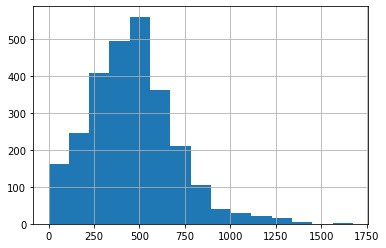

,duration_sum_month
tariff,
smart,421.266319
ultra,557.168883


Дисперсия по тарифу smart равна 35273.8
Стандартное откланение по тарифу smart равно 187.8
Дисперсия по тарифу ultra равна 97349.1
Стандартное откланение по тарифу ultra равно 312.0


In [43]:
data_all_dropna['duration_sum_month'].hist(bins=15)
plt.show()
display(data_all_dropna.pivot_table(index='tariff', values='duration_sum_month'))
smart_var = data_all_dropna.query('tariff == "smart"')
smart_var = list(smart_var['duration_sum_month'])
ultra_var = data_all_dropna.query('tariff == "ultra"')
ultra_var = list(ultra_var['duration_sum_month'])
std_smart = np.sqrt(np.var(smart_var ,ddof=1))
std_ultra = np.sqrt(np.var(ultra_var ,ddof=1))
print(f'Дисперсия по тарифу smart равна {round(np.var(smart_var ,ddof=1), 1)}')
print(f'Стандартное откланение по тарифу smart равно {round(std_smart, 1)}')
print(f'Дисперсия по тарифу ultra равна {round(np.var(ultra_var ,ddof=1), 1)}')
print(f'Стандартное откланение по тарифу ultra равно {round(std_ultra, 1)}')

# расчет среднего количества минут, смс и интернета, требующихся в месяц 
# расчет дисперсии
# расчет стандартного отклонения
# построение гистограммы

**На основании построенной гистограммы можно сказать следующее:**

- Большинству пользователей достаточно от 200 до 600 минут в месяц на разговоры
- Есть небольшой процент тех кому на разговоры требуется более 1000 минут
- Отдельные значения доходят и до 1600 минут.


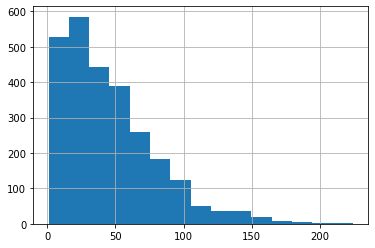

,sms_count_month
tariff,
smart,38.767102
ultra,61.640957


Дисперсия по тарифу smart равна 718.8
Стандартное откланение по тарифу smart равно 26.8
Дисперсия по тарифу ultra равна 2008.6
Стандартное откланение по тарифу ultra равно 44.8


In [44]:
data_all_dropna['sms_count_month'].hist(bins=15)
plt.show()
display(data_all_dropna.pivot_table(index='tariff', values='sms_count_month'))
smart_var = data_all_dropna.query('tariff == "smart"')
smart_var = list(smart_var['sms_count_month'])
ultra_var = data_all_dropna.query('tariff == "ultra"')
ultra_var = list(ultra_var['sms_count_month'])
std_smart = np.sqrt(np.var(smart_var ,ddof=1))
std_ultra = np.sqrt(np.var(ultra_var ,ddof=1))
print(f'Дисперсия по тарифу smart равна {round(np.var(smart_var ,ddof=1), 1)}')
print(f'Стандартное откланение по тарифу smart равно {round(std_smart, 1)}')
print(f'Дисперсия по тарифу ultra равна {round(np.var(ultra_var ,ddof=1), 1)}')
print(f'Стандартное откланение по тарифу ultra равно {round(std_ultra, 1)}')

# расчет среднего количества минут, смс и интернета, требующихся в месяц 
# расчет дисперсии
# расчет стандартного отклонения
# построение гистограммы

**На основании построенной гистограммы можно сказать следующее:**

- Большинству пользователей достаточно  до 60 смс в месяц
- Есть небольшой процент тех кому на разговоры требуется более 100 смс
- Отдельные значения доходят и до 200 смс.

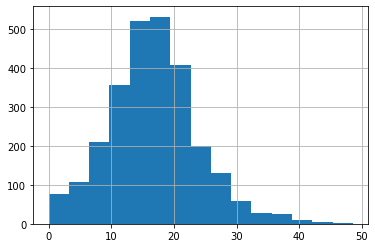

,gb_month
tariff,
smart,15.864495
ultra,19.137059


Дисперсия по тарифу smart равна 32.0
Стандартное откланение по тарифу smart равно 5.7
Дисперсия по тарифу ultra равна 88.4
Стандартное откланение по тарифу ultra равно 9.4


In [45]:
data_all_dropna['gb_month'].hist(bins=15)
plt.show()
display(data_all_dropna.pivot_table(index='tariff', values='gb_month'))
smart_var = data_all_dropna.query('tariff == "smart"')
smart_var = list(smart_var['gb_month'])
ultra_var = data_all_dropna.query('tariff == "ultra"')
ultra_var = list(ultra_var['gb_month'])
std_smart = np.sqrt(np.var(smart_var ,ddof=1))
std_ultra = np.sqrt(np.var(ultra_var ,ddof=1))
print(f'Дисперсия по тарифу smart равна {round(np.var(smart_var ,ddof=1), 1)}')
print(f'Стандартное откланение по тарифу smart равно {round(std_smart, 1)}')
print(f'Дисперсия по тарифу ultra равна {round(np.var(ultra_var ,ddof=1), 1)}')
print(f'Стандартное откланение по тарифу ultra равно {round(std_ultra, 1)}')

# расчет среднего количества минут, смс и интернета, требующихся в месяц 
# расчет дисперсии
# расчет стандартного отклонения
# построение гистограммы

**На основании построенной гистограммы можно сказать следующее:**

- Большинству пользователей достаточно от 10 до 25 гб в месяц
- Есть небольшой процент тех кому требуется более 30 гб, а также тех, кому требуется менее 10гб
- Отдельные значения доходят и до 40-47 гб.

## Проверка гипотез

In [46]:
data_all.head(12)

,user_id,month,duration_count_month,duration_sum_month,calls_money,sms_count_month,messages_money,mb_month,gb_month,age,churn_date,city,first_name,last_name,reg_date,tariff,internet_money,user_money
0,1000,5,22.0,159.0,0.0,22.0,0.0,2253.49,2.200674,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
1,1000,6,43.0,172.0,0.0,60.0,0.0,23233.77,22.689229,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
2,1000,7,47.0,340.0,0.0,75.0,0.0,14003.64,13.675430,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
3,1000,8,52.0,409.0,0.0,81.0,0.0,14055.93,13.726494,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
4,1000,9,58.0,467.0,0.0,57.0,0.0,14568.91,14.227451,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
5,1000,10,57.0,350.0,0.0,73.0,0.0,14702.49,14.357900,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
6,1000,11,43.0,338.0,0.0,58.0,0.0,14756.47,14.410615,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
7,1000,12,46.0,333.0,0.0,70.0,0.0,9817.61,9.587510,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,1950.0
8,1001,11,59.0,430.0,0.0,NaN,0.0,18429.34,17.997402,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart,600.0,1150.0
9,1001,12,63.0,414.0,0.0,NaN,0.0,14036.66,13.707676,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart,0.0,550.0


In [47]:
smart_money = data_all.query('tariff == "smart"')['user_money'].astype('int')
smart_money = list(smart_money)

ultra_money = data_all.query('tariff == "ultra"')['user_money'].astype('int')
ultra_money = list(ultra_money)
# подготовка выборки для проверки

In [48]:
alpha = .05

results = st.ttest_ind(ultra_money,smart_money)

print('p-значение:',results[1]) 

if results[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# проверка гипотезы

p-значение: 3.214703782989713e-195
Отвергаем нулевую гипотезу


In [49]:
msk_money = data_all.query('city == "Москва"')['user_money'].astype('int')
msk_money = list(msk_money)

other_money = data_all.query('city != "Москва"')['user_money'].astype('int')
other_money = list(other_money)
#other_money = other_money[:611]
# подготовка выборки для проверки

In [50]:
alpha = .05

results = st.ttest_ind(msk_money,other_money)

print('p-значение:',results[1]) 

if results[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# проверка гипотезы

p-значение: 0.4526049245157435
Не получилось отвергнуть нулевую гипотезу


**Вывод**

1) **Гипотеза**: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"
- нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- альтернативная гипотеза средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- вероятность равной средней выручки оказалась меньше порогового значения (0.05), поэтому нулевая гипотеза отвергается в пользу альтернативной

2) **Гипотеза**: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- нулевая гипотеза: средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов"
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- вероятность равной средней выручки оказалась значительно выше порогового значения (0.05), поэтому нулевая гипотеза не отвергается

## Вывод

Исследование проходило в несколько этапов:

1) Обзор данных

2) Предобратока данных

В ходе предобратки:

- исправлен формат времени,
- дубликаты не обнаружены.
- заполнены некоторые пропуски
- объединены таблицы 

3) Добавление столбцов

На этом этапе были добавлены следующие столбцы:
- количество сделанных звонков и израсходованных минут разговора по месяцам
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка.


4) Исследовательский анализ данных

На данном этапе были:
- Выявлено количество минут разговора, сообщений и объём интернет-трафика необходимое для среднестатистического пользователя каждого тарифа в месяц.
- Для каждого из перечисленных параметров посчитаны среднее количество, дисперсия и стандартное отклонение. 

5) Проверка гипотез

В результате проверки гипотез было установлено:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны.